In [8]:
# Import the libraries

import pandas as pd 
import numpy as np

from pprint import pprint

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
%matplotlib inline

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('/Users/siriamanda/Desktop/LNU-VT-2021/Thesis/11-data-analysis/sentiment-analysis-of-reviews/02-topic-modeling/05-python-for-data/python-for-data-final.csv')


In [10]:
df.head()

,Unnamed: 0,date,review,rating,status,length,label,compound,sentiment,preprocessed,topic_id,topic_score
0,0,2021-03-11,"Interesting and clear, the difficulty in the e...",4,completer,186,pos,0.7957,pos,"['interest', 'clear', 'difficulty', 'exercise'...",0.0,0.799936
1,1,2021-03-11,"great, i have learned basics of python from th...",5,completer,56,pos,0.6249,pos,"['learn', 'basic', 'python', 'course']",0.0,0.875579
2,2,2021-03-10,Recommended,5,completer,11,pos,0.2023,pos,['recommend'],0.0,0.673877
3,3,2021-03-10,excellent,5,completer,9,pos,0.5719,pos,['excellent'],0.0,0.683688
4,4,2021-03-10,Tamada sir is my biggest inspiration to comple...,5,completer,102,pos,0.5267,pos,"['tamada', 'sir', 'big', 'inspiration', 'compl...",2.0,0.747881


In [11]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
df.head()

,date,review,rating,status,length,label,compound,sentiment,preprocessed,topic_id,topic_score
0,2021-03-11,"Interesting and clear, the difficulty in the e...",4,completer,186,pos,0.7957,pos,"['interest', 'clear', 'difficulty', 'exercise'...",0.0,0.799936
1,2021-03-11,"great, i have learned basics of python from th...",5,completer,56,pos,0.6249,pos,"['learn', 'basic', 'python', 'course']",0.0,0.875579
2,2021-03-10,Recommended,5,completer,11,pos,0.2023,pos,['recommend'],0.0,0.673877
3,2021-03-10,excellent,5,completer,9,pos,0.5719,pos,['excellent'],0.0,0.683688
4,2021-03-10,Tamada sir is my biggest inspiration to comple...,5,completer,102,pos,0.5267,pos,"['tamada', 'sir', 'big', 'inspiration', 'compl...",2.0,0.747881


In [13]:
topic_name = []

for row in df['topic_id']:
    if row == 0.0:
        topic_name.append('Content')
    elif row == 1.0:
        topic_name.append('Delivery')
    else:
        topic_name.append('Assessment')

In [14]:
df['topic_name'] = topic_name

In [15]:
df.head()

,date,review,rating,status,length,label,compound,sentiment,preprocessed,topic_id,topic_score,topic_name
0,2021-03-11,"Interesting and clear, the difficulty in the e...",4,completer,186,pos,0.7957,pos,"['interest', 'clear', 'difficulty', 'exercise'...",0.0,0.799936,Content
1,2021-03-11,"great, i have learned basics of python from th...",5,completer,56,pos,0.6249,pos,"['learn', 'basic', 'python', 'course']",0.0,0.875579,Content
2,2021-03-10,Recommended,5,completer,11,pos,0.2023,pos,['recommend'],0.0,0.673877,Content
3,2021-03-10,excellent,5,completer,9,pos,0.5719,pos,['excellent'],0.0,0.683688,Content
4,2021-03-10,Tamada sir is my biggest inspiration to comple...,5,completer,102,pos,0.5267,pos,"['tamada', 'sir', 'big', 'inspiration', 'compl...",2.0,0.747881,Assessment


In [68]:
df.shape

(3023, 12)

In [74]:
# Save dataframe as a csv file

# df.to_csv('python-for-data-topic-name.csv')

## Exploratory Analysis

In [16]:
df['rating'].value_counts()

5    1736
4     694
3     314
2     140
1     139
Name: rating, dtype: int64

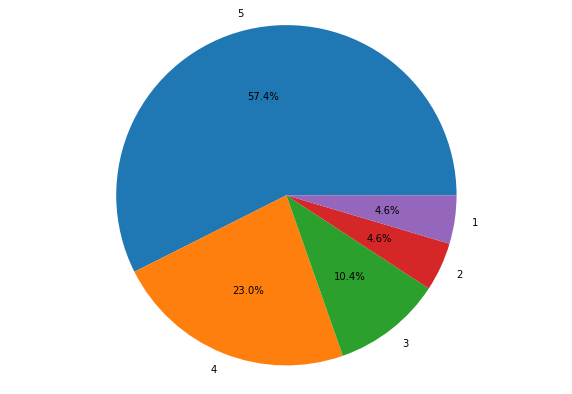

In [70]:
# 57.4 % of the review had a rating of 5

plt.figure(figsize =(10, 7)) 
plt.pie([1736, 694, 314, 140, 139], labels = ['5', '4', '3', '2', '1'], autopct='%1.1f%%');
plt.axis('equal')
plt.show()

In [69]:
df.rating.describe()

count    3023.000000
mean        4.239828
std         1.104579
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [22]:
# Majority of reviews had a rating of five followed by 4 and 3

px.histogram(df, x = df['rating']).update_xaxes(categoryorder = 'total ascending')

In [24]:
# Longest reviews had a rating of 1 or 2

px.box(df, x = "rating", y = "length")

## Sentiment Analysis

Code reference: https://towardsdatascience.com/sentiment-analysis-on-amazon-reviews-45cd169447ac

In [25]:
df['sentiment'].value_counts()

pos    2345
neu     349
neg     329
Name: sentiment, dtype: int64

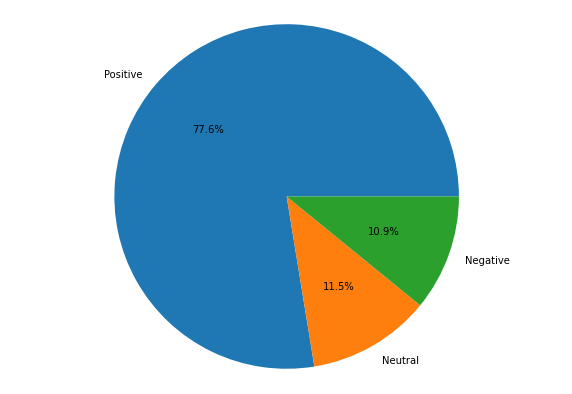

In [28]:
# 77.6% of the review were classified as 'positive'

plt.figure(figsize =(10, 7)) 
plt.pie([2345, 349, 329], labels = ['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%');
plt.axis('equal')
plt.show()

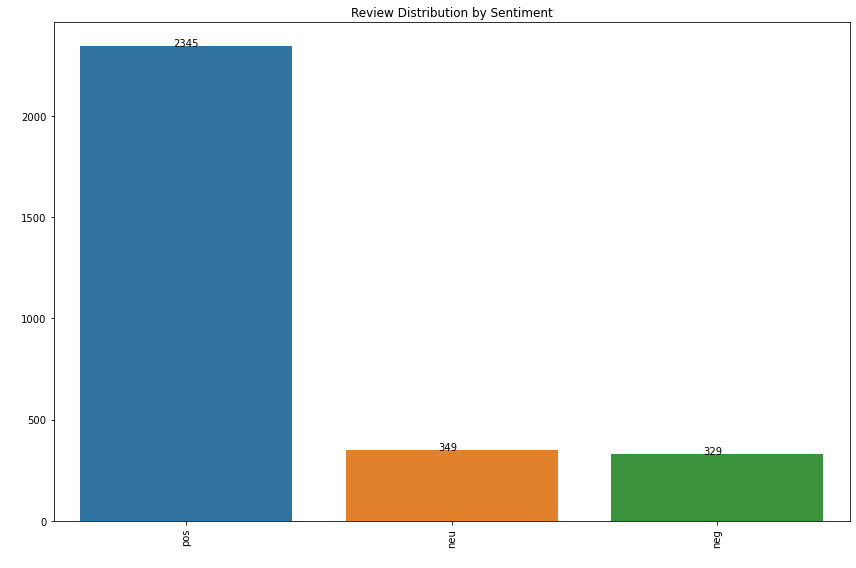

In [29]:
# Most reviews are positive followed by neutral

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "sentiment", data = df, ax = ax, order = df['sentiment'].value_counts().index)
ax.set_title("Review Distribution by Sentiment")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

In [31]:
# The longest review were positive followed by negative

px.box(df, x = "sentiment", y = "length").update_xaxes(categoryorder = 'total ascending')


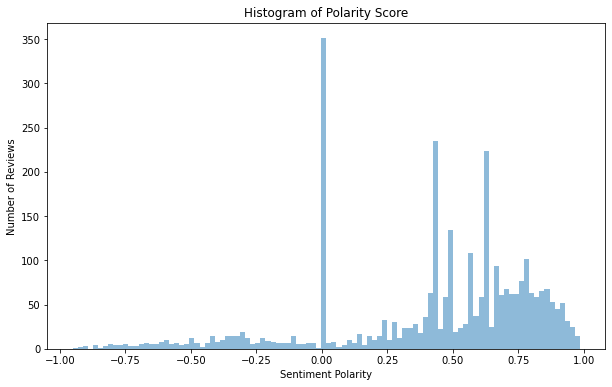

In [32]:
# Histogram of the compound polarity score

num_bins = 100
plt.figure(figsize = (10,6))
n, bins, patches = plt.hist(df.compound, num_bins, alpha = 0.5)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

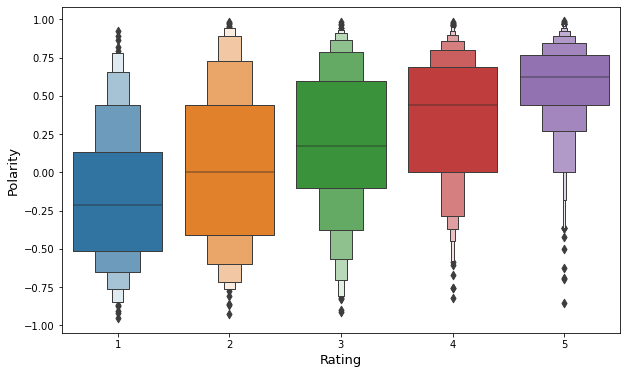

In [34]:
# Small correlation between rating and the polarity score

plt.figure(figsize = (10,6))
sns.boxenplot(x = 'rating', y = 'compound', data = df)
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.show();

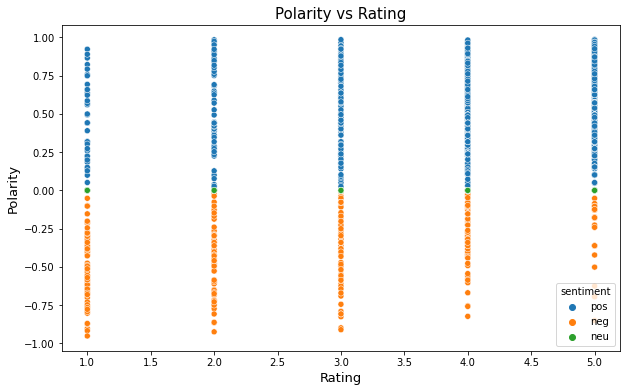

In [35]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='rating', y='compound', hue="sentiment", data=df)
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Polarity vs Rating', fontsize=15)
plt.show();

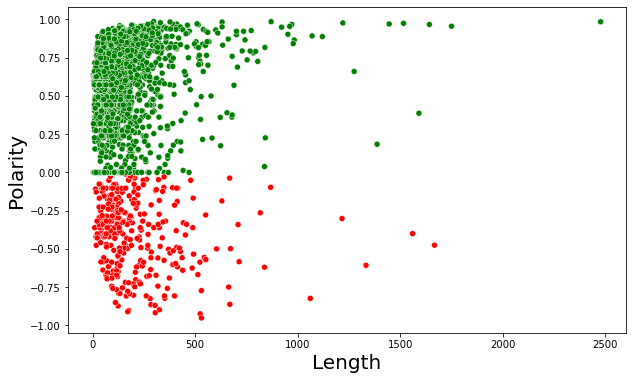

In [36]:
# Plot using seaborn

x = df['length']
y = df['compound']

plt.figure(figsize = (10,6))
ax = sns.scatterplot(x, y, c = [ 'r' if i < 0 else 'g' for i in y])
ax.set_xlabel(xlabel='Length', size = 20)
ax.set_ylabel(ylabel='Polarity', size = 20);


## Topic Modeling


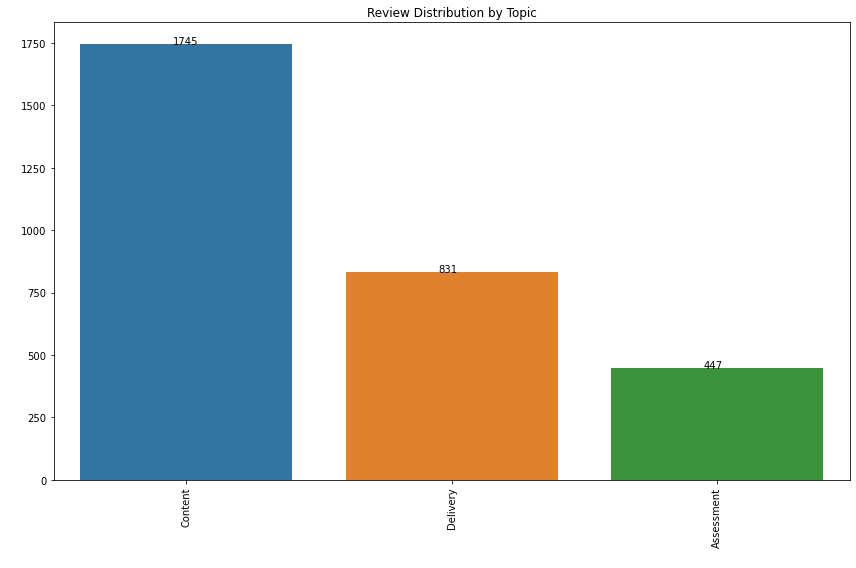

In [37]:
# Reviews per topic

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "topic_name", data = df, ax = ax, order = df['topic_name'].value_counts().index)
ax.set_title("Review Distribution by Topic")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

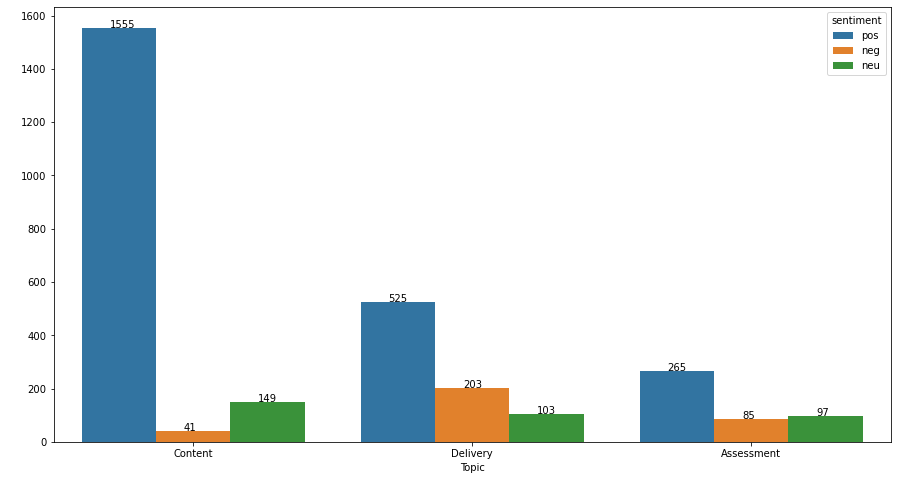

In [38]:
# Topics sentimentwise

plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'topic_name', hue = 'sentiment', data = df, order = df['topic_name'].value_counts().index)
ax.set_xlabel('Topic')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 1))
plt.show()

In [39]:
# Negative reviews

negative = df.loc[df['sentiment'] == 'neg']

In [40]:
negative.shape

(329, 12)

In [71]:
negative.length.describe()

count     329.000000
mean      214.012158
std       216.841377
min        10.000000
25%        80.000000
50%       143.000000
75%       280.000000
max      1667.000000
Name: length, dtype: float64

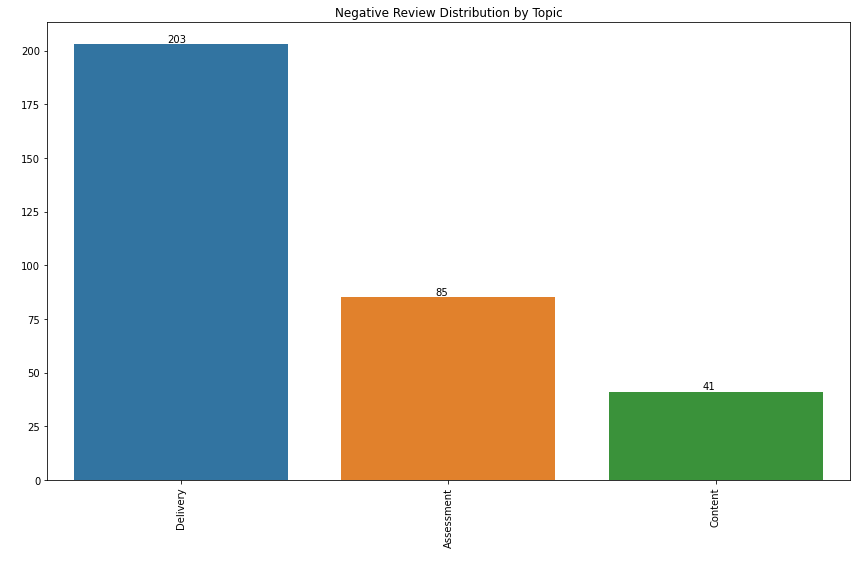

In [51]:
# Reviews per topic

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "topic_name", data = negative, ax = ax, order = negative['topic_name'].value_counts().index)
ax.set_title("Negative Review Distribution by Topic")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

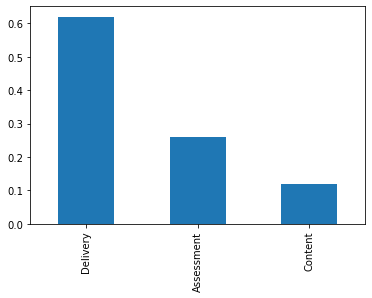

In [50]:
# Topic distribution as a percentage

round(negative.topic_name.value_counts()/len(negative), 2).plot(kind = 'bar');

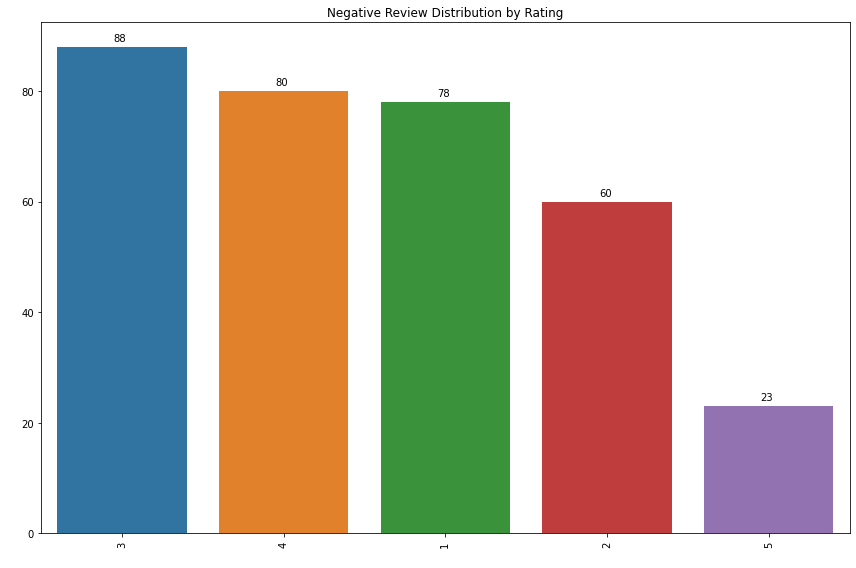

In [53]:
# Negative distribution by rating

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "rating", data = negative, ax = ax, order = negative['rating'].value_counts().index)
ax.set_title("Negative Review Distribution by Rating")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

In [54]:
# Neutral reviews

neutral = df.loc[df['sentiment'] == 'neu']

In [55]:
neutral.shape

(349, 12)

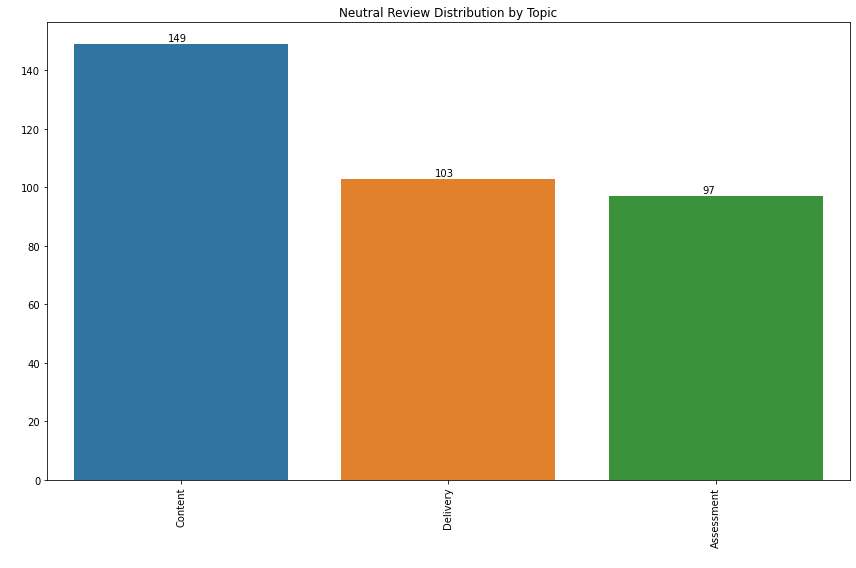

In [59]:
# Reviews per topic

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "topic_name", data = neutral, ax = ax, order = neutral['topic_name'].value_counts().index)
ax.set_title("Neutral Review Distribution by Topic")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

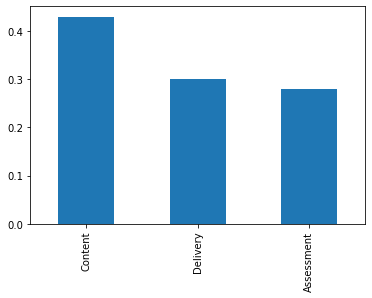

In [60]:
# Topic distribution as a percentage

round(neutral.topic_name.value_counts()/len(neutral), 2).plot(kind = 'bar');

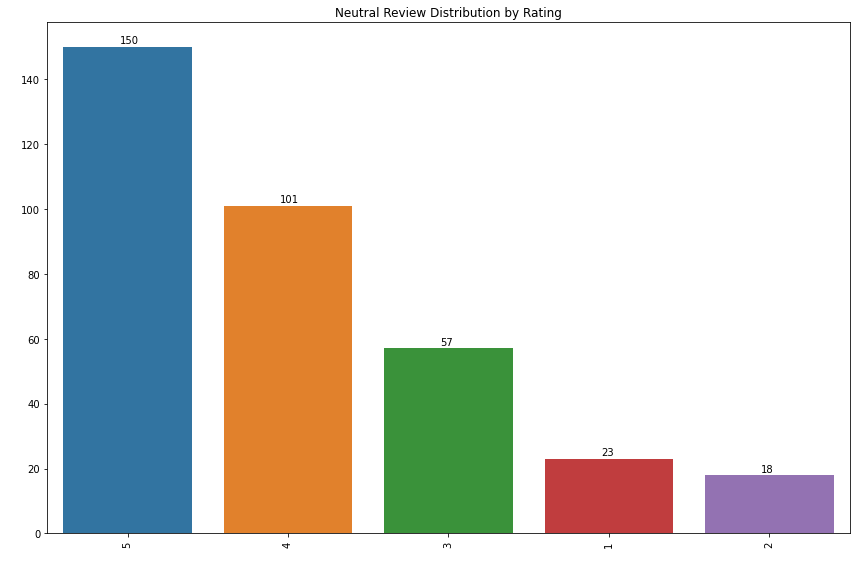

In [61]:
# Most neutral reviews had a reting of 5, another indication of the flaw in the sentiment analysis

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "rating", data = neutral, ax = ax, order = neutral['rating'].value_counts().index)
ax.set_title("Neutral Review Distribution by Rating")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

In [62]:
# Positive reviews

positive = df.loc[df['sentiment'] == 'pos']

In [63]:
positive.shape

(2345, 12)

In [72]:
positive.length.describe()

count    2345.000000
mean      123.881876
std       161.940629
min         4.000000
25%        37.000000
50%        76.000000
75%       151.000000
max      2477.000000
Name: length, dtype: float64

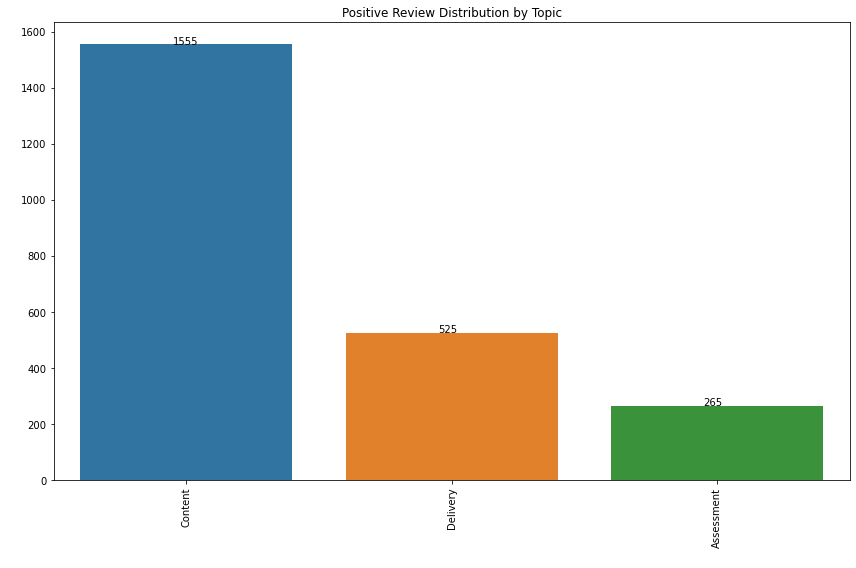

In [64]:
# Reviews per topic

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "topic_name", data = positive, ax = ax, order = positive['topic_name'].value_counts().index)
ax.set_title("Positive Review Distribution by Topic")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()

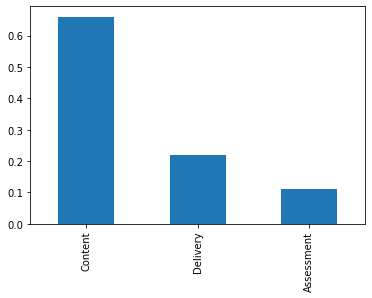

In [66]:
# Topic distribution as a percentage

round(positive.topic_name.value_counts()/len(positive), 2).plot(kind = 'bar');

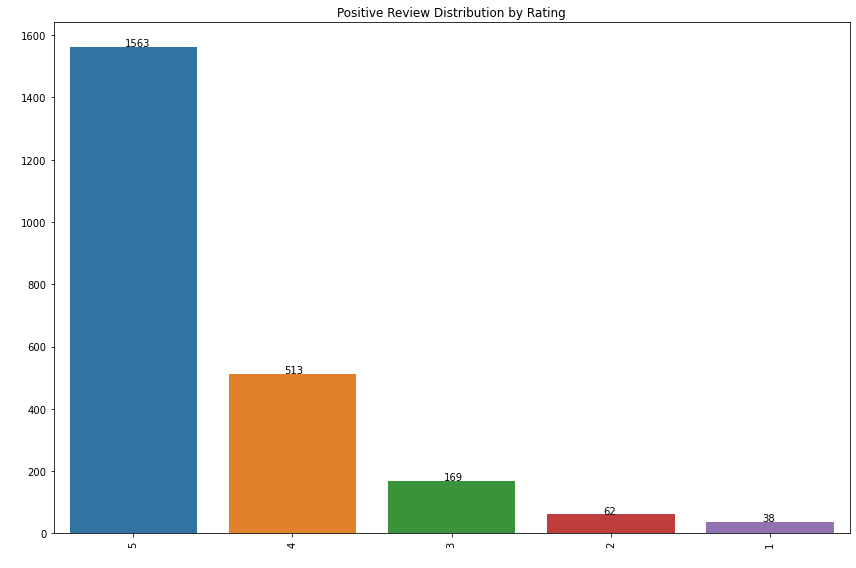

In [67]:
# Most positive reviews had a positive rating

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x = "rating", data = positive, ax = ax, order = positive['rating'].value_counts().index)
ax.set_title("Positive Review Distribution by Rating")
ax.set_xticklabels(p.get_xticklabels(), rotation = 90)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1))
plt.tight_layout()
plt.show()